# LIBRARY PREPARATION

In [6]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# DATA PREPARATION

In [7]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../Dataset/TSLA_data.csv')
df = df[::-1]

In [9]:
df1=df.reset_index()['Close']
df1.head()

0    227.500000
1    241.369995
2    241.550003
3    254.110001
4    252.350006
Name: Close, dtype: float64

In [10]:
df1

0       227.500000
1       241.369995
2       241.550003
3       254.110001
4       252.350006
           ...    
1830     22.427334
1831     21.105333
1832     20.974667
1833     21.150000
1834     21.368668
Name: Close, Length: 1835, dtype: float64

In [11]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# TRAIN-TEST SPLIT

In [12]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [13]:
print(train_size)
print(test_size)

1468
367


In [14]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100

x, y = create_dataset(df1, time_step)

X_train = x[:train_size-100]
X_test = x[train_size-100:]
y_train = y[:train_size-100]
y_test = y[train_size-100:]

In [16]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
X_test.shape

(366, 100, 1)

# TRAINING PROCESSS

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Define LSTM Model
model = Sequential()
model.add(Input(shape=(time_step, 1)))  # Sử dụng lớp Input để định nghĩa kích thước đầu vào
model.add(SimpleRNN(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, epochs=24, batch_size=64, verbose=1)

Epoch 1/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0427
Epoch 2/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1333e-04
Epoch 3/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1910e-04
Epoch 4/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5894e-04
Epoch 5/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0561e-04
Epoch 6/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2907e-04
Epoch 7/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1350e-04
Epoch 8/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4858e-04
Epoch 9/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8017e-04
Epoch 10/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6382e-04
Epoch 11/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2841e-04
Epoch 12/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2054e-04
Epoch 13/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4551e-04
Epoch 14/24
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1670e-04
Epoch 15/24
22/22 ━━━━━━━━━━━━━

In [22]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [23]:
# 11. Chuẩn hóa dữ liệu y_pred, y_test
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# EVALUATION

In [24]:
# Các độ đo
import numpy as np

# Mean Absolute Error
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Mean Absolute Percentage Error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Mean Squared Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Root Mean Squared Error
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Mean Absolute Scaled Error
def mase(y_true, y_pred, y_train):
    n = len(y_train)
    d = np.mean(np.abs(y_train[1:] - y_train[:-1]))
    errors = np.abs(y_true - y_pred)
    return np.mean(errors / d)

In [25]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
# Tính độ đo cho tập kiểm tra
test_mae = mae(y_pred, y_test)
test_mape = mape(y_pred, y_test)
test_mase = mase(y_pred, y_test, y_train)
test_mse = mse(y_pred, y_test)
test_rmse = rmse(y_pred, y_test)

print(f'Test MAE: {test_mae:.4f}')
print(f'Test MAPE: {test_mape:.4f}%')
print(f'Test MASE: {test_mase:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Test MAE: 0.7474
Test MAPE: 3.6838%
Test MASE: 64.6188
Test MSE: 0.9412
Test RMSE: 0.9701


# PREDICTION

In [28]:
# 13. Dự báo 30 ngày tiếp theo (test có 319 ngày)
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=306
i=0
while(i<30):

    if(len(temp_input)>250):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.01354195 0.01348211 0.01260876 0.01289655 0.01374284 0.01581296
 0.01567048 0.01487264 0.01594973 0.01498377 0.0139081  0.01385824
 0.01390098 0.01515758 0.01650109 0.02007571 0.01934341 0.01693848
 0.01706813 0.01648969 0.01599389 0.0176081  0.01804691 0.01836605
 0.01778049 0.01840737 0.01892596 0.01907271 0.01806971 0.01831334
 0.01969674 0.02028514 0.01907983 0.01898295 0.01824352 0.01849285
 0.01688149 0.01672762 0.01682166 0.01603379 0.0154753  0.0170895
 0.01756536 0.02398371 0.0238042  0.0235734  0.0221444  0.02397659
 0.02365033 0.02273281 0.02227975 0.02222419 0.0197637  0.01729466
 0.01868519 0.02191645 0.02206889 0.01954144 0.02096046 0.01658658
 0.02006004 0.01943459 0.02194067 0.0225191  0.02414186 0.0266052
 0.02818379 0.026732   0.02675479 0.02652541 0.02550247 0.02622765
 0.02574894 0.02557655 0.02443535 0.02310894 0.0240635  0.02350073
 0.02379708 0.02092342 0.02268437 0.02400936 0.02486134 0.02498102
 0.02414471 0.02351213 0.02276131 0.02169989 0.02443

In [30]:
# 13b. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=306
i=0
while(i<60):

    if(len(temp_input)>250):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.01354195 0.01348211 0.01260876 0.01289655 0.01374284 0.01581296
 0.01567048 0.01487264 0.01594973 0.01498377 0.0139081  0.01385824
 0.01390098 0.01515758 0.01650109 0.02007571 0.01934341 0.01693848
 0.01706813 0.01648969 0.01599389 0.0176081  0.01804691 0.01836605
 0.01778049 0.01840737 0.01892596 0.01907271 0.01806971 0.01831334
 0.01969674 0.02028514 0.01907983 0.01898295 0.01824352 0.01849285
 0.01688149 0.01672762 0.01682166 0.01603379 0.0154753  0.0170895
 0.01756536 0.02398371 0.0238042  0.0235734  0.0221444  0.02397659
 0.02365033 0.02273281 0.02227975 0.02222419 0.0197637  0.01729466
 0.01868519 0.02191645 0.02206889 0.01954144 0.02096046 0.01658658
 0.02006004 0.01943459 0.02194067 0.0225191  0.02414186 0.0266052
 0.02818379 0.026732   0.02675479 0.02652541 0.02550247 0.02622765
 0.02574894 0.02557655 0.02443535 0.02310894 0.0240635  0.02350073
 0.02379708 0.02092342 0.02268437 0.02400936 0.02486134 0.02498102
 0.02414471 0.02351213 0.02276131 0.02169989 0.02443

In [32]:
# 13c. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=306
i=0
while(i<90):

    if(len(temp_input)>250):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


0 day input [0.01354195 0.01348211 0.01260876 0.01289655 0.01374284 0.01581296
 0.01567048 0.01487264 0.01594973 0.01498377 0.0139081  0.01385824
 0.01390098 0.01515758 0.01650109 0.02007571 0.01934341 0.01693848
 0.01706813 0.01648969 0.01599389 0.0176081  0.01804691 0.01836605
 0.01778049 0.01840737 0.01892596 0.01907271 0.01806971 0.01831334
 0.01969674 0.02028514 0.01907983 0.01898295 0.01824352 0.01849285
 0.01688149 0.01672762 0.01682166 0.01603379 0.0154753  0.0170895
 0.01756536 0.02398371 0.0238042  0.0235734  0.0221444  0.02397659
 0.02365033 0.02273281 0.02227975 0.02222419 0.0197637  0.01729466
 0.01868519 0.02191645 0.02206889 0.01954144 0.02096046 0.01658658
 0.02006004 0.01943459 0.02194067 0.0225191  0.02414186 0.0266052
 0.02818379 0.026732   0.02675479 0.02652541 0.02550247 0.02622765
 0.02574894 0.02557655 0.02443535 0.02310894 0.0240635  0.02350073
 0.02379708 0.02092342 0.02268437 0.02400936 0.02486134 0.02498102
 0.02414471 0.02351213 0.02276131 0.02169989 0.02443

In [33]:
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size+1-101, step=1)
test_data_index.shape

(267,)

In [34]:
y_pred.shape

(366, 1)

# VISUALIZATION

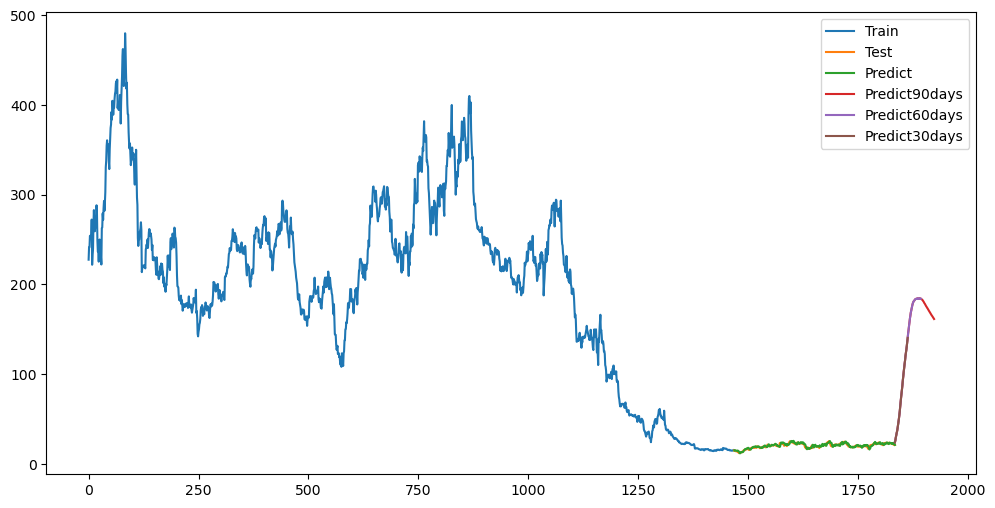

In [38]:
# 14. Vẽ hình
plt.figure(figsize=(12, 6))

# Tạo chỉ số cho dữ liệu huấn luyện
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

# Tạo chỉ số cho dữ liệu kiểm tra, khớp với test_data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

# Tạo chỉ số cho dự báo và vẽ dự báo
test_data_index = pd.RangeIndex(start=train_size + 1, stop=train_size + len(y_pred) + 1, step=1)
plt.plot(test_data_index, y_pred)

# Tạo chỉ số cho dự báo 90 ngày và vẽ
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90, scaler.inverse_transform(lst_output_90))

# Tạo chỉ số cho dự báo 60 ngày và vẽ
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60, scaler.inverse_transform(lst_output_60))

# Tạo chỉ số cho dự báo 30 ngày và vẽ
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))

# Thêm chú thích vào đồ thị
plt.legend(['Train','Test','Predict','Predict90days', 'Predict60days','Predict30days'])

# Hiển thị đồ thị
plt.show()
